In [1]:
import pandas as pd
import numpy as np
import geopandas
import shapely
from matplotlib import pyplot as plt

In [2]:
name_csv = "checkins_Alaska.csv"

In [3]:
df = pd.read_csv("./checkins_separated/"+name_csv)

In [4]:
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,geometry,index_right,NAME
0,862,40713,2010-07-16T05:24:31Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,2000,0,10,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-149.996389 61.174444),40.0,Alaska
1,862,40713,2010-07-07T09:29:28Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,2000,0,10,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-149.996389 61.174444),40.0,Alaska
2,4906,40713,2009-12-20T14:46:52Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,2000,0,10,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-149.996389 61.174444),40.0,Alaska
3,73266,40713,2010-04-06T02:28:10Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,2000,0,10,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-149.996389 61.174444),40.0,Alaska
4,73266,40713,2010-03-27T17:02:17Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,2000,0,10,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-149.996389 61.174444),40.0,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32418,2113292,6447100,2010-12-16T21:05:04Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,35,0,0,10,"[{'url': '/categories/90', 'name': 'Modern'}]",POINT (-151.3983522 60.226312917),40.0,Alaska
32419,2113292,6447100,2010-12-05T02:39:03Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,35,0,0,10,"[{'url': '/categories/90', 'name': 'Modern'}]",POINT (-151.3983522 60.226312917),40.0,Alaska
32420,2113292,6447100,2010-11-29T04:04:18Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,35,0,0,10,"[{'url': '/categories/90', 'name': 'Modern'}]",POINT (-151.3983522 60.226312917),40.0,Alaska
32421,2113292,6447100,2010-11-19T05:06:52Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,35,0,0,10,"[{'url': '/categories/90', 'name': 'Modern'}]",POINT (-151.3983522 60.226312917),40.0,Alaska


In [5]:
df["time"] = pd.to_datetime(df["datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [6]:
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df["weekday"] = df["time"].dt.weekday
df["timeslot"] = df.apply(lambda x: max(x["hour"]*2-1, 0) if x["minute"] < 30 else x["hour"]+1, axis=1)
df["day"] = df["time"].dt.day_of_year
df["year"] = df["time"].dt.year

In [7]:
df = df.drop_duplicates(subset=["userid", "timeslot", "day"], keep="last").reset_index(drop=True)

In [8]:
df["rank"] = df.groupby("userid")["day"].rank(method="dense", ascending=True)

In [9]:
df["userid"].unique()

array([    862,    4906,   73266,   28386,   81984,   74627,   14712,
         11870,   40796,   80987,     468,  369886,  375542, 2080769,
         53536,  317115,   67750,     189,    7350,    4232,  348363,
        147565,   63807,    3198,    2886, 2554554, 2293636,   19658,
        147903,   17008,     341,  293839,  177490,  141824, 2163882,
         24497,    2314,  247666, 1501304, 2210752,   72553,  265303,
        289436, 1396482,   73479,  247852,  523780,   68052,  277288,
         52612,  373285,   10117, 1877069,  122215,  229955,  391547,
       2382368,   52766,   53075,  248272,  641678,  102287, 1702450,
         17024, 2490833,  226959,  387165, 2118023,    6758,  534631,
       2213129, 2198969,  162164,   78550,    9121,  334888, 2305731,
       2128341,   77184,    1686,   29448,  216158, 1014171,   17373,
        260209,   80697, 2341937,  225684, 2579990,    1620,  287367,
         10403,  156901,  301524,   28098,  346970,   13380,  344702,
         92883,  194

In [10]:
# transformar a coluna rank em inteiro
df["rank"] = df["rank"].astype(int)
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
0,862,40713,2010-07-16T05:24:31Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-07-16 05:24:31,5,24,4,9,197,2010,10
1,862,40713,2010-07-07T09:29:28Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-07-07 09:29:28,9,29,2,17,188,2010,1
2,4906,40713,2009-12-20T14:46:52Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2009-12-20 14:46:52,14,46,6,15,354,2009,1
3,73266,40713,2010-04-06T02:28:10Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-04-06 02:28:10,2,28,1,3,96,2010,21
4,28386,40713,2009-12-17T20:03:32Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2009-12-17 20:03:32,20,3,3,39,351,2009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14655,2113292,6447100,2010-12-16T21:05:04Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-12-16 21:05:04,21,5,3,41,350,2010,33
14656,2113292,6447100,2010-12-05T02:39:03Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-12-05 02:39:03,2,39,6,3,339,2010,31
14657,2113292,6447100,2010-11-29T04:04:18Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-11-29 04:04:18,4,4,0,7,333,2010,29
14658,2113292,6447100,2010-11-19T05:06:52Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-11-19 05:06:52,5,6,4,9,323,2010,27


<Axes: ylabel='Frequency'>

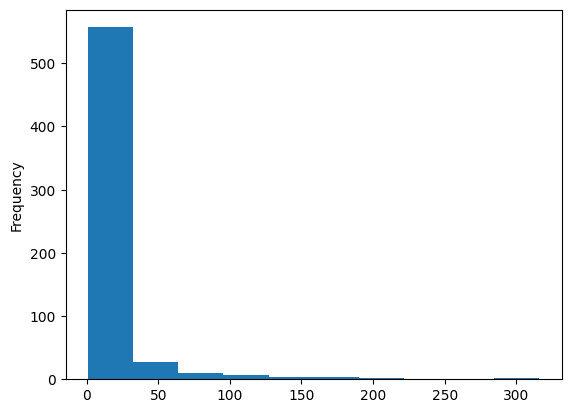

In [11]:
df.groupby("userid")["rank"].max().plot(kind="hist", bins=10)

In [12]:
df["userid"].nunique()

612

In [13]:

train = df.copy()
train = df[df["userid"].isin((df.groupby("userid")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 7").userid.tolist()))]
train

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
0,862,40713,2010-07-16T05:24:31Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-07-16 05:24:31,5,24,4,9,197,2010,10
1,862,40713,2010-07-07T09:29:28Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-07-07 09:29:28,9,29,2,17,188,2010,1
3,73266,40713,2010-04-06T02:28:10Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-04-06 02:28:10,2,28,1,3,96,2010,21
6,74627,40713,2010-07-27T14:39:06Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-07-27 14:39:06,14,39,1,15,208,2010,7
7,74627,40713,2010-07-26T17:37:05Z,40713,2009-10-08T21:57:45Z,-149.996389,61.174444,21,832,295,...,40.0,Alaska,2010-07-26 17:37:05,17,37,0,18,207,2010,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14655,2113292,6447100,2010-12-16T21:05:04Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-12-16 21:05:04,21,5,3,41,350,2010,33
14656,2113292,6447100,2010-12-05T02:39:03Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-12-05 02:39:03,2,39,6,3,339,2010,31
14657,2113292,6447100,2010-11-29T04:04:18Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-11-29 04:04:18,4,4,0,7,333,2010,29
14658,2113292,6447100,2010-11-19T05:06:52Z,6447100,2010-11-17T19:08:41Z,-151.398352,60.226313,0,5,1,...,40.0,Alaska,2010-11-19 05:06:52,5,6,4,9,323,2010,27


In [14]:
gdf = geopandas.GeoDataFrame(train, geometry=geopandas.points_from_xy(x=train.lng, y=train.lat))

<Axes: >

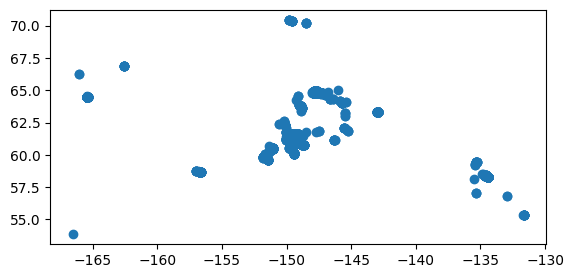

In [15]:
gdf.plot()

In [16]:
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=199
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
    for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [17]:
cell["id"] = range(len(cell))

(-168.26912854350002, -129.8956720265, 53.079321486, 71.223311834)

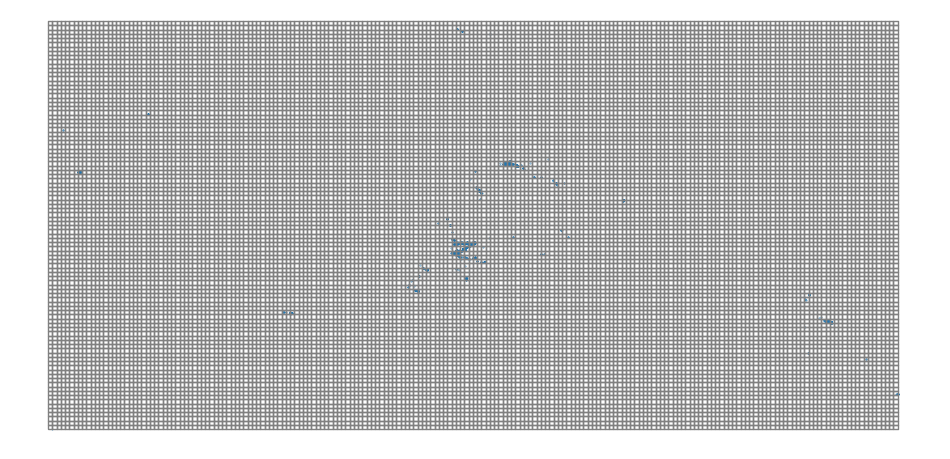

In [18]:
ax = gdf.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [19]:
cell

,geometry,x,y,id
0,"POLYGON ((-166.70018 53.90405, -166.70018 54.0...",0,0,0
1,"POLYGON ((-166.70018 54.07935, -166.70018 54.2...",0,1,1
2,"POLYGON ((-166.70018 54.25465, -166.70018 54.4...",0,2,2
3,"POLYGON ((-166.70018 54.42995, -166.70018 54.6...",0,3,3
4,"POLYGON ((-166.70018 54.60525, -166.70018 54.7...",0,4,4
...,...,...,...,...
19195,"POLYGON ((-131.81522 69.85647, -131.81522 70.0...",199,91,19195
19196,"POLYGON ((-131.81522 70.03177, -131.81522 70.2...",199,92,19196
19197,"POLYGON ((-131.81522 70.20707, -131.81522 70.3...",199,93,19197
19198,"POLYGON ((-131.81522 70.38237, -131.81522 70.5...",199,94,19198


In [20]:
merged = geopandas.sjoin(gdf.drop(["index_right"], axis=1), cell, how='left', op='within')

/home/alvaro/Documentos/GitHub/LP-BERT/lpbert/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [21]:
train = merged[["userid", "timeslot", "rank", "x", "y"]]
train = train.sort_values(by=['userid','rank', 'timeslot'])
train = train.dropna()

In [22]:
train.rename(columns={'timeslot':'t'}, inplace=True)
train.rename(columns={'rank':'d'}, inplace=True)
train.rename(columns={'userid': 'uid'}, inplace=True)
train
# train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})

,uid,t,d,x,y
4724,189,3,1,96.0,41.0
23,189,1,2,95.0,41.0
25,189,39,3,95.0,41.0
4983,189,19,4,96.0,41.0
1349,189,39,4,96.0,41.0
...,...,...,...,...,...
9458,2636755,17,21,96.0,41.0
7360,2636755,0,22,96.0,41.0
9457,2636755,31,23,96.0,41.0
9504,2636755,31,24,96.0,41.0


In [23]:
train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})
train

,uid,t,d,x,y
4724,189,3,1,96,41
23,189,1,2,95,41
25,189,39,3,95,41
4983,189,19,4,96,41
1349,189,39,4,96,41
...,...,...,...,...,...
9458,2636755,17,21,96,41
7360,2636755,0,22,96,41
9457,2636755,31,23,96,41
9504,2636755,31,24,96,41


In [24]:
quartis = train.quantile([0.25, 0.5, 0.75])
quartis['d']
# first_quartil = quartis.loc[0.25, 'd']
# first_quartil

0.25    12.0
0.50    37.0
0.75    88.0
Name: d, dtype: float64

In [25]:
count = train.groupby('uid').size().reset_index(name='counts')
filtered_uids = count.query('counts <= 128')['uid']
filtered_df = train[train['uid'].isin(filtered_uids)]

In [26]:
test_size = 0.25
test_count = int(len(filtered_df) * test_size)

train = filtered_df.sort_values(by=['uid', 'd', 't'])

df_train = train[:-test_count]
df_test = train[-test_count:]

# from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(train, test_size=0.2, random_state=42)
# df_sorted = train.sort_values(by=['uid', 'd', 't'])
# df_train = df_sorted[df_sorted['d'] <= 20]
# df_test = df_sorted[df_sorted['d'] > 20]
# df_train

In [27]:
train_csv = "train/train2_" + name_csv
test_csv = "test/test2_" + name_csv

In [28]:
df_train.to_csv(train_csv, index=False)
df_test.to_csv(test_csv, index=False)